In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import hdtree
from hdtree import HDTreeClassifier
from information_measure import EntropyMeasure
# import information_measure
# import split_rule
from split_rule import LessThanHalfOfSplit, SingleCategorySplit, FixedValueSplit, TwentyQuantileSplit, LogisticRegressionSingleSplit, AbstractQuantileSplit, TwentyQuantileRangeSplit, TwoQuantileRangeSplit, LogisticRegressionDoubleCategorySplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, plot_roc_curve, auc
import pickle
from joblib import dump, load
import json

In [86]:
def runMetrics(trueVal,preds):
    if len(set(trueVal))<=2:
        print('Accuracy = ', accuracy_score(trueVal,preds))
        print('Macro Precision = ', precision_score(trueVal,preds,average='macro'))
        print('Micro Precision = ', precision_score(trueVal,preds,average='micro'))
        print('Weighted Precision = ', precision_score(trueVal,preds,average='weighted'))
        print('Macro Recall = ', recall_score(trueVal,preds,average='macro'))
        print('Micro Recall = ', recall_score(trueVal,preds,average='micro'))
        print('Weighted Recall = ', recall_score(trueVal,preds,average='weighted'))
        print('Macro F1 = ', f1_score(trueVal,preds,average='macro'))
        print('Micro F1 = ', f1_score(trueVal,preds,average='micro'))
        print('Weighted F1 = ', f1_score(trueVal,preds,average='weighted'))
        print('\nClassification Report\n', classification_report(trueVal,preds))
    else:
        print('Accuracy = ', accuracy_score(trueVal,preds))
        print('Macro Precision = ', precision_score(trueVal,preds,average='macro'))
        print('Micro Precision = ', precision_score(trueVal,preds,average='micro'))
        print('Weighted Precision = ', precision_score(trueVal,preds,average='weighted'))
        print('Macro Recall = ', recall_score(trueVal,preds,average='macro'))
        print('Micro Recall = ', recall_score(trueVal,preds,average='micro'))
        print('Weighted Recall = ', recall_score(trueVal,preds,average='weighted'))
        print('Macro F1 = ', f1_score(trueVal,preds,average='macro'))
        print('Micro F1 = ', f1_score(trueVal,preds,average='micro'))
        print('Weighted F1 = ', f1_score(trueVal,preds,average='weighted'))
        print('\nClassification Report\n', classification_report(trueVal,preds))

In [87]:
def getAucRocMetrics(trueVal, probabs, pos_label):
    fpr, tpr, thresholds = roc_curve(trueVal, probabs, pos_label=pos_label)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(trueVal, probabs))
    plt.legend(loc="lower right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    auc = roc_auc_score(trueVal, probabs)
    print('AUC = ', auc)

# Dataset 1

## Mean 

In [88]:
train_data = pd.read_csv('../../data/train1mean.csv')
test_data = pd.read_csv('../../data/test1mean.csv')

In [89]:
train_data.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [91]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,0.637437,0.073030,0.112436,...,0.001669,0.003339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.000000,0.002667,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.000000,0.200000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
col_names = [*train_data.columns[:]]

In [93]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [94]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [95]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [96]:
treeData1Mean = hdtree.HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[split_rule.LogisticRegressionSingleSplit.build(), split_rule.TwoQuantileRangeSplit.build()], 
                    information_measure=information_measure.EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=1)

In [97]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((167, 28), (167,), (666, 28), (666,))

In [98]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.96996996996997
0.9520958083832335


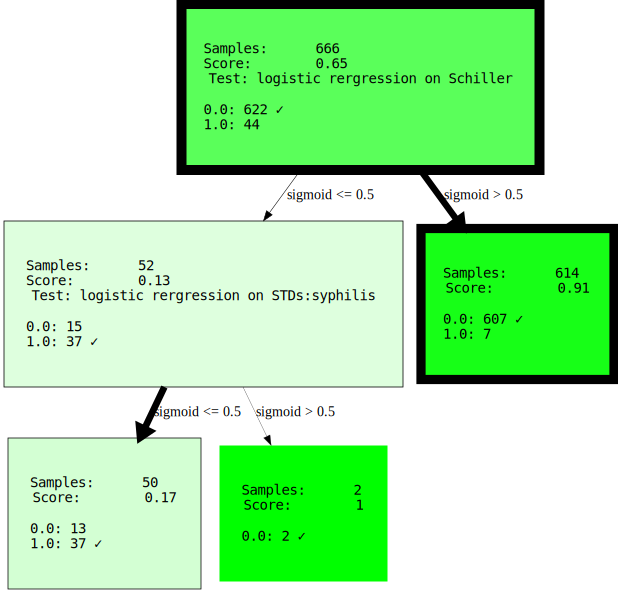

In [99]:
treeData1Mean.generate_dot_graph()

In [100]:
preds = treeData1Mean.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9520958083832335
Macro Precision =  0.7894736842105263
Micro Precision =  0.9520958083832335
Weighted Precision =  0.9722659943271352
Macro Recall =  0.9743589743589743
Micro Recall =  0.9520958083832335
Weighted Recall =  0.9520958083832335
Macro F1 =  0.8535087719298247
Micro F1 =  0.9520958083832335
Weighted F1 =  0.9578527156213887

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       156
         1.0       0.58      1.00      0.73        11

    accuracy                           0.95       167
   macro avg       0.79      0.97      0.85       167
weighted avg       0.97      0.95      0.96       167



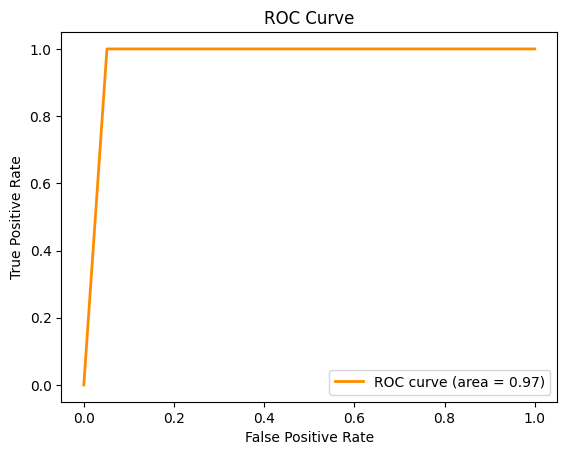

AUC =  0.9743589743589743


In [101]:
getAucRocMetrics(y_test.values, treeData1Mean.predict_proba(X_test.values)[:, 1], 1)

In [102]:
treeData1Mean = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [103]:
treeData1Mean.fit(X_train.values, y_train.values)
print(treeData1Mean.score(X_train.values, y_train.values))
print(treeData1Mean.score(X_test.values, y_test.values))

0.9579579579579579
0.9281437125748503


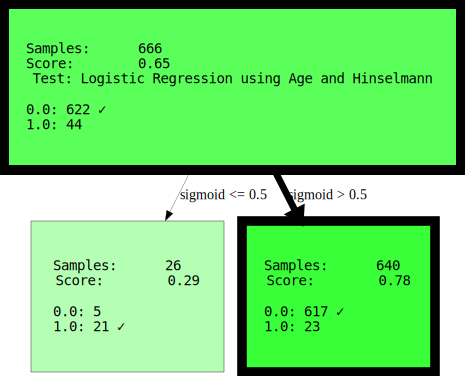

In [104]:
treeData1Mean.generate_dot_graph()

In [105]:
preds = treeData1Mean.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9281437125748503
Macro Precision =  0.700070323488045
Micro Precision =  0.9281437125748503
Weighted Precision =  0.9220209370288959
Macro Recall =  0.6657925407925408
Micro Recall =  0.9281437125748503
Weighted Recall =  0.9281437125748503
Macro F1 =  0.6808917197452229
Micro F1 =  0.9281437125748502
Weighted F1 =  0.9247797398832909

Classification Report
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       156
         1.0       0.44      0.36      0.40        11

    accuracy                           0.93       167
   macro avg       0.70      0.67      0.68       167
weighted avg       0.92      0.93      0.92       167



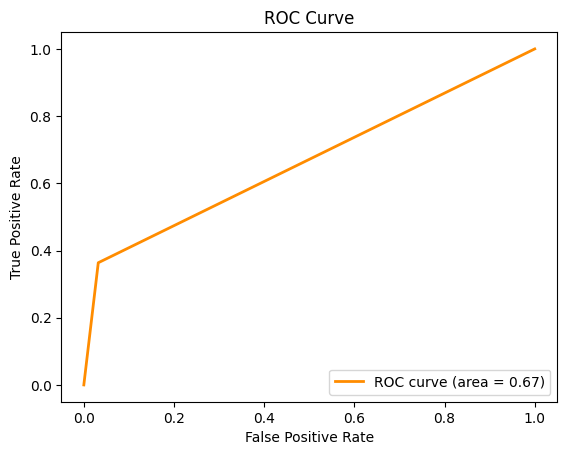

AUC =  0.6657925407925408


In [106]:
getAucRocMetrics(y_test.values, treeData1Mean.predict_proba(X_test.values)[:, 1], 1)

## Median

In [107]:
train_data = pd.read_csv('../../data/train1median.csv')
test_data = pd.read_csv('../../data/test1median.csv')

In [108]:
train_data.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,1.0,0.014000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.0,0.002667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [109]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [110]:
train_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.384615,0.000000,0.409091,0.250,0.0,0.000000,0.000000,1.0,0.014000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.153846,0.142857,0.227273,0.125,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.307692,0.000000,0.636364,0.125,0.0,0.000000,0.000000,1.0,0.002667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.230769,0.071429,0.227273,0.250,1.0,0.135135,0.033784,1.0,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.435897,0.000000,0.500000,0.250,0.0,0.000000,0.000000,0.0,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
col_names = [*train_data.columns[:]]

In [112]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [113]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [114]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [115]:
treeData1Median = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [116]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((167, 28), (167,), (666, 28), (666,))

In [117]:
treeData1Median.fit(X_train.values, y_train.values)
print(treeData1Median.score(X_train.values, y_train.values))
print(treeData1Median.score(X_test.values, y_test.values))

0.9669669669669669
0.9520958083832335


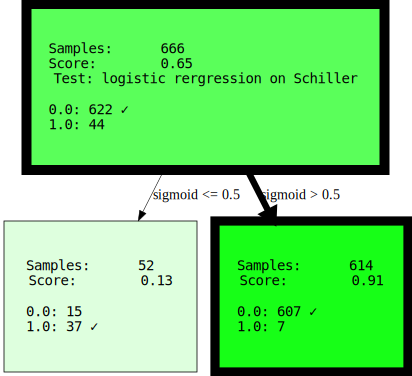

In [118]:
treeData1Median.generate_dot_graph()

In [119]:
preds = treeData1Median.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9520958083832335
Macro Precision =  0.7894736842105263
Micro Precision =  0.9520958083832335
Weighted Precision =  0.9722659943271352
Macro Recall =  0.9743589743589743
Micro Recall =  0.9520958083832335
Weighted Recall =  0.9520958083832335
Macro F1 =  0.8535087719298247
Micro F1 =  0.9520958083832335
Weighted F1 =  0.9578527156213887

Classification Report
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       156
         1.0       0.58      1.00      0.73        11

    accuracy                           0.95       167
   macro avg       0.79      0.97      0.85       167
weighted avg       0.97      0.95      0.96       167



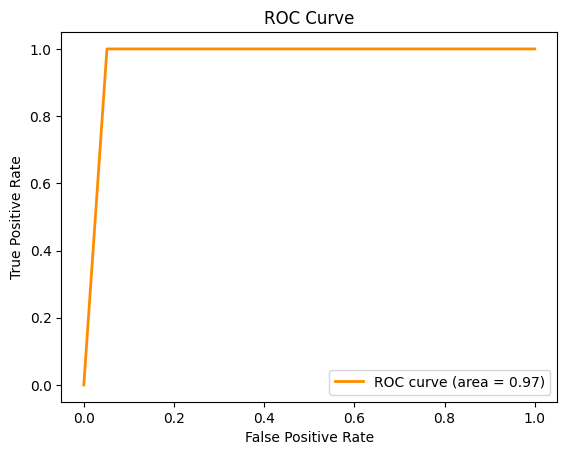

AUC =  0.9743589743589743


In [120]:
getAucRocMetrics(y_test.values, treeData1Median.predict_proba(X_test.values)[:, 1], 1)

In [121]:
treeData1Median = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [122]:
treeData1Median.fit(X_train.values, y_train.values)
print(treeData1Median.score(X_train.values, y_train.values))
print(treeData1Median.score(X_test.values, y_test.values))

0.9579579579579579
0.9281437125748503


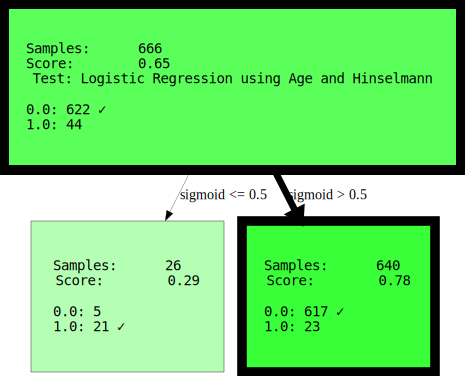

In [123]:
treeData1Median.generate_dot_graph()

In [124]:
preds = treeData1Median.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9281437125748503
Macro Precision =  0.700070323488045
Micro Precision =  0.9281437125748503
Weighted Precision =  0.9220209370288959
Macro Recall =  0.6657925407925408
Micro Recall =  0.9281437125748503
Weighted Recall =  0.9281437125748503
Macro F1 =  0.6808917197452229
Micro F1 =  0.9281437125748502
Weighted F1 =  0.9247797398832909

Classification Report
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       156
         1.0       0.44      0.36      0.40        11

    accuracy                           0.93       167
   macro avg       0.70      0.67      0.68       167
weighted avg       0.92      0.93      0.92       167



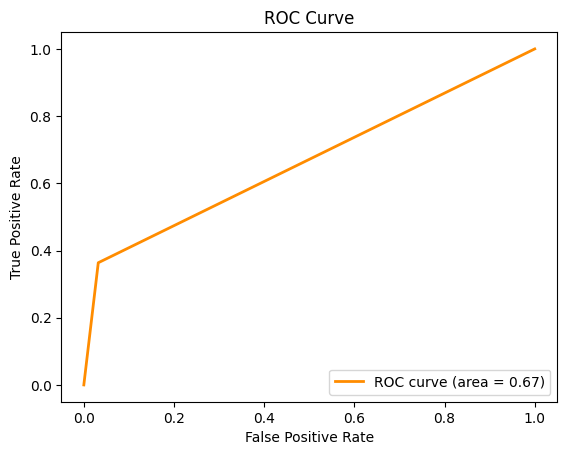

AUC =  0.6657925407925408


In [125]:
getAucRocMetrics(y_test.values, treeData1Median.predict_proba(X_test.values)[:, 1], 1)

# Dataset 2
## Single Attribute

In [126]:
train_data = pd.read_csv('../../data/train2Ones.csv')
test_data = pd.read_csv('../../data/test2Ones.csv')

In [127]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [128]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,1.0
1,1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,1.0
2,2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,1.0
3,3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,1.0
4,4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,1.0


In [129]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [130]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,0.296703,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,1.0
1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,0.000000,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,1.0
2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,0.000000,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,1.0
3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,0.000000,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,1.0
4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,0.175824,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,1.0


In [131]:
col_names = [*train_data.columns[:]]

In [132]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [133]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [134]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [135]:
treeData2Ones = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [136]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((416, 20), (416,), (1664, 20), (1664,))

In [137]:
treeData2Ones.fit(X_train.values, y_train.values)
print(treeData2Ones.score(X_train.values, y_train.values))
print(treeData2Ones.score(X_test.values, y_test.values))

0.8725961538461539
0.8774038461538461


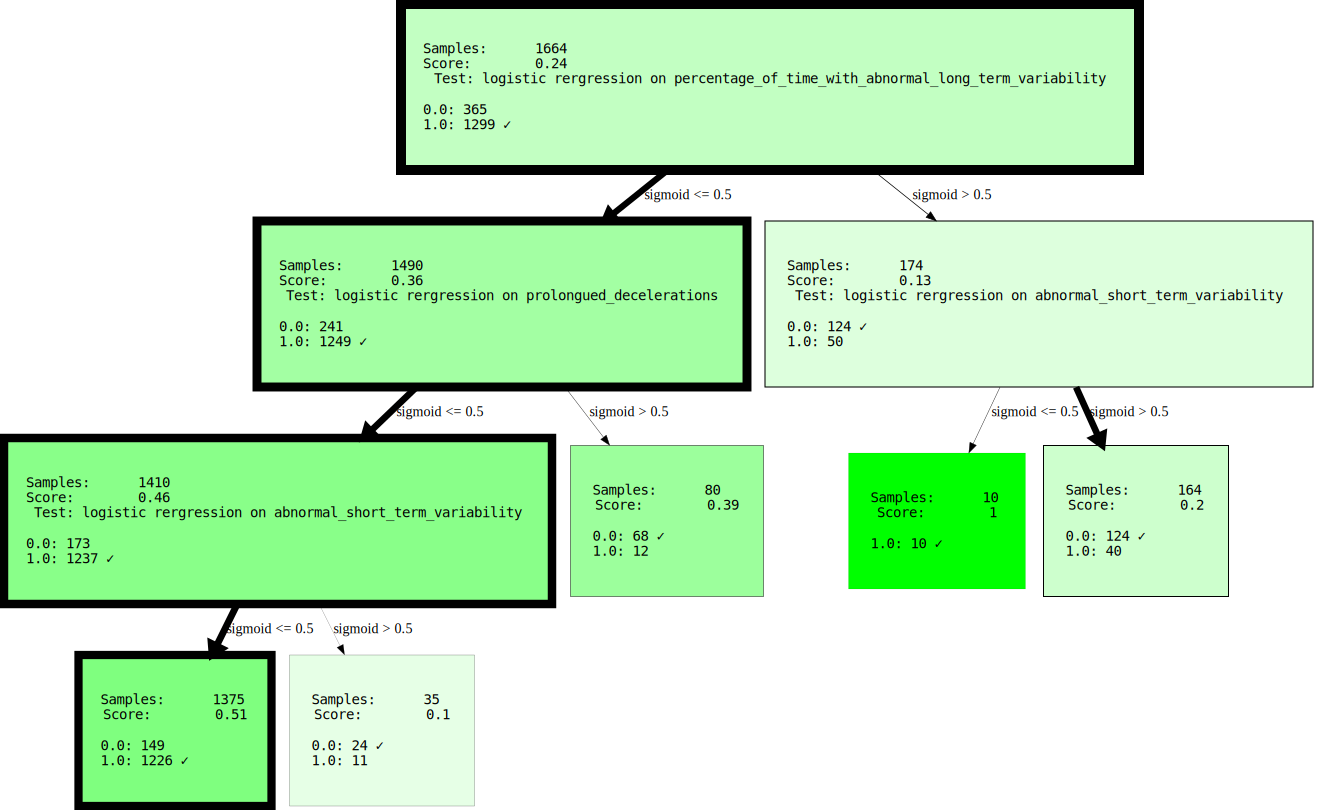

In [138]:
treeData2Ones.generate_dot_graph()

In [139]:
preds = treeData2Ones.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8774038461538461
Macro Precision =  0.8493064920053939
Micro Precision =  0.8774038461538461
Weighted Precision =  0.8719716910184787
Macro Recall =  0.7533976173007721
Micro Recall =  0.8774038461538461
Weighted Recall =  0.8774038461538461
Macro F1 =  0.7870200271043517
Micro F1 =  0.8774038461538461
Weighted F1 =  0.8677317769566677

Classification Report
               precision    recall  f1-score   support

         0.0       0.81      0.54      0.65        87
         1.0       0.89      0.97      0.93       329

    accuracy                           0.88       416
   macro avg       0.85      0.75      0.79       416
weighted avg       0.87      0.88      0.87       416



In [140]:
onesProb = treeData2Ones.predict_proba(X_test.values)[:, 1]

In [141]:
fpr[0], tpr[0], _ = roc_curve(y_test.values, onesProb)
roc_auc[0] = auc(fpr[0], tpr[0])

In [142]:
train_data = pd.read_csv('../../data/train2Twos.csv')
test_data = pd.read_csv('../../data/test2Twos.csv')

In [143]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [144]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [145]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,0.296703,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,0.000000,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,0.000000,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,0.000000,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,0.175824,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [146]:
col_names = [*train_data.columns[:]]

In [147]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [148]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [149]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [150]:
treeData2Twos = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [151]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((416, 20), (416,), (1664, 20), (1664,))

In [152]:
treeData2Twos.fit(X_train.values, y_train.values)
print(treeData2Twos.score(X_train.values, y_train.values))
print(treeData2Twos.score(X_test.values, y_test.values))

0.8804086538461539
0.8918269230769231


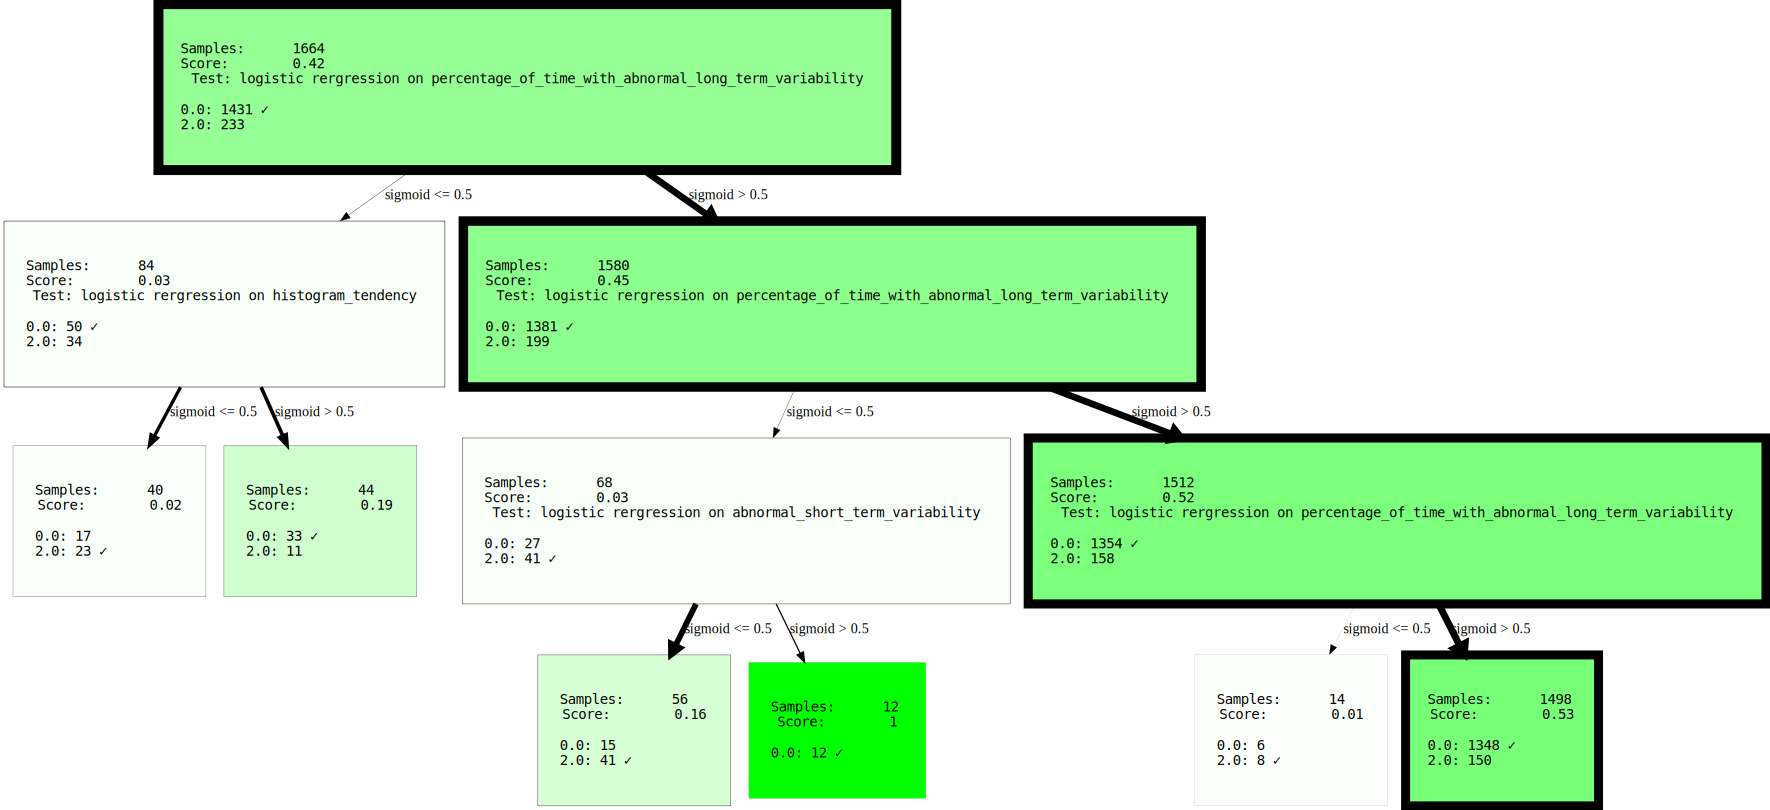

In [153]:
treeData2Twos.generate_dot_graph()

In [154]:
preds = treeData2Twos.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8918269230769231
Macro Precision =  0.7698276682852518
Micro Precision =  0.8918269230769231
Weighted Precision =  0.8749761972769685
Macro Recall =  0.6497252747252747
Micro Recall =  0.8918269230769231
Weighted Recall =  0.8918269230769231
Macro F1 =  0.6853093953300721
Micro F1 =  0.8918269230769231
Weighted F1 =  0.8765066317010438

Classification Report
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       364
         2.0       0.63      0.33      0.43        52

    accuracy                           0.89       416
   macro avg       0.77      0.65      0.69       416
weighted avg       0.87      0.89      0.88       416



In [155]:
twosProb = treeData2Twos.predict_proba(X_test.values)[:, 1]

In [156]:
fpr[1], tpr[1], _ = roc_curve(y_test.values, twosProb, pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

In [157]:
train_data = pd.read_csv('../../data/train2Threes.csv')
test_data = pd.read_csv('../../data/test2Threes.csv')

In [158]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [159]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [160]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,0.296703,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,0.000000,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,0.000000,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,0.000000,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,0.175824,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [161]:
col_names = [*train_data.columns[:]]

In [162]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [163]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [164]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [165]:
treeData2threes = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [166]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((416, 20), (416,), (1664, 20), (1664,))

In [167]:
treeData2threes.fit(X_train.values, y_train.values)
print(treeData2threes.score(X_train.values, y_train.values))
print(treeData2threes.score(X_test.values, y_test.values))

0.9338942307692307
0.9302884615384616


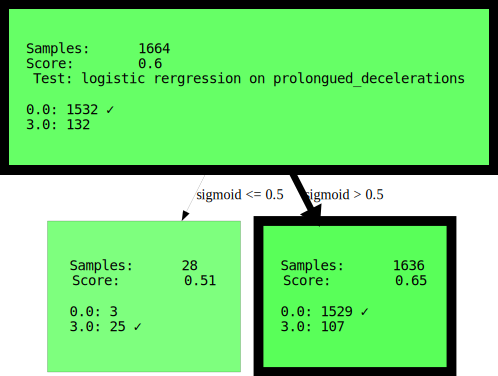

In [168]:
treeData2threes.generate_dot_graph()

In [169]:
preds = treeData2threes.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9302884615384616
Macro Precision =  0.9646341463414634
Micro Precision =  0.9302884615384616
Weighted Precision =  0.935219277673546
Macro Recall =  0.5857142857142857
Micro Recall =  0.9302884615384616
Weighted Recall =  0.9302884615384616
Macro F1 =  0.6280102371188061
Micro F1 =  0.9302884615384615
Weighted F1 =  0.9069122788500082

Classification Report
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       381
         3.0       1.00      0.17      0.29        35

    accuracy                           0.93       416
   macro avg       0.96      0.59      0.63       416
weighted avg       0.94      0.93      0.91       416



In [170]:
threesProb = treeData2threes.predict_proba(X_test.values)[:, 1]

In [171]:
fpr[2], tpr[2], _ = roc_curve(y_test.values, threesProb, pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

In [172]:
probabs = np.hstack((onesProb.reshape(-1,1), twosProb.reshape(-1,1), threesProb.reshape(-1,1)))

In [173]:
vals = np.argmax(probabs, axis=1) + 1

In [174]:
test_df = pd.read_csv('../../data/test2.csv')

In [175]:
test_y = test_df['fetal_health']

In [176]:
runMetrics(test_y.values, vals)

Accuracy =  0.8317307692307693
Macro Precision =  0.7869875222816399
Micro Precision =  0.8317307692307693
Weighted Precision =  0.8275401069518716
Macro Recall =  0.4987686072792456
Micro Recall =  0.8317307692307693
Weighted Recall =  0.8317307692307693
Macro F1 =  0.5392826015419083
Micro F1 =  0.8317307692307692
Weighted F1 =  0.8002523207112423

Classification Report
               precision    recall  f1-score   support

         1.0       0.86      0.98      0.92       329
         2.0       0.50      0.35      0.41        52
         3.0       1.00      0.17      0.29        35

    accuracy                           0.83       416
   macro avg       0.79      0.50      0.54       416
weighted avg       0.83      0.83      0.80       416



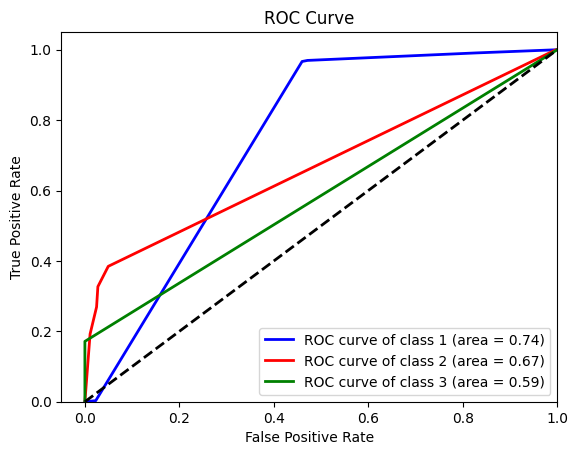

In [177]:
from itertools import cycle
lw = 2
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Pair of Attributes

In [178]:
train_data = pd.read_csv('../../data/train2Ones.csv')
test_data = pd.read_csv('../../data/test2Ones.csv')

In [179]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [180]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,1.0
1,1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,1.0
2,2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,1.0
3,3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,1.0
4,4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,1.0


In [181]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [182]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,0.296703,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,1.0
1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,0.000000,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,1.0
2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,0.000000,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,1.0
3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,0.000000,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,1.0
4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,0.175824,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,1.0


In [183]:
col_names = [*train_data.columns[:]]

In [184]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [185]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [186]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [187]:
treeData2Ones = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [188]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((416, 20), (416,), (1664, 20), (1664,))

In [189]:
treeData2Ones.fit(X_train.values, y_train.values)
print(treeData2Ones.score(X_train.values, y_train.values))
print(treeData2Ones.score(X_test.values, y_test.values))

0.8179086538461539
0.8197115384615384


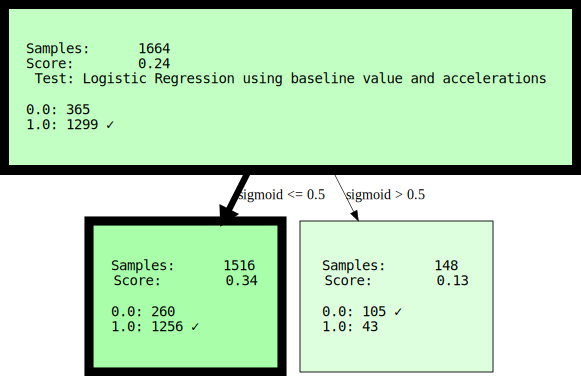

In [190]:
treeData2Ones.generate_dot_graph()

In [191]:
preds = treeData2Ones.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8197115384615384
Macro Precision =  0.7975311490539917
Micro Precision =  0.8197115384615384
Weighted Precision =  0.8119603271094389
Macro Recall =  0.5901023652307585
Micro Recall =  0.8197115384615384
Weighted Recall =  0.8197115384615384
Macro F1 =  0.6040960828352812
Micro F1 =  0.8197115384615384
Weighted F1 =  0.7740600576286175

Classification Report
               precision    recall  f1-score   support

         0.0       0.77      0.20      0.31        87
         1.0       0.82      0.98      0.90       329

    accuracy                           0.82       416
   macro avg       0.80      0.59      0.60       416
weighted avg       0.81      0.82      0.77       416



In [192]:
onesProb = treeData2Ones.predict_proba(X_test.values)[:, 1]

In [193]:
fpr[0], tpr[0], _ = roc_curve(y_test.values, onesProb)
roc_auc[0] = auc(fpr[0], tpr[0])

In [194]:
train_data = pd.read_csv('../../data/train2Twos.csv')
test_data = pd.read_csv('../../data/test2Twos.csv')

In [195]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [196]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [197]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,0.296703,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,0.000000,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,0.000000,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,0.000000,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,0.175824,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [198]:
col_names = [*train_data.columns[:]]

In [199]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [200]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [201]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [202]:
treeData2Twos = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [203]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((416, 20), (416,), (1664, 20), (1664,))

In [204]:
treeData2Twos.fit(X_train.values, y_train.values)
print(treeData2Twos.score(X_train.values, y_train.values))
print(treeData2Twos.score(X_test.values, y_test.values))

0.8629807692307693
0.8774038461538461


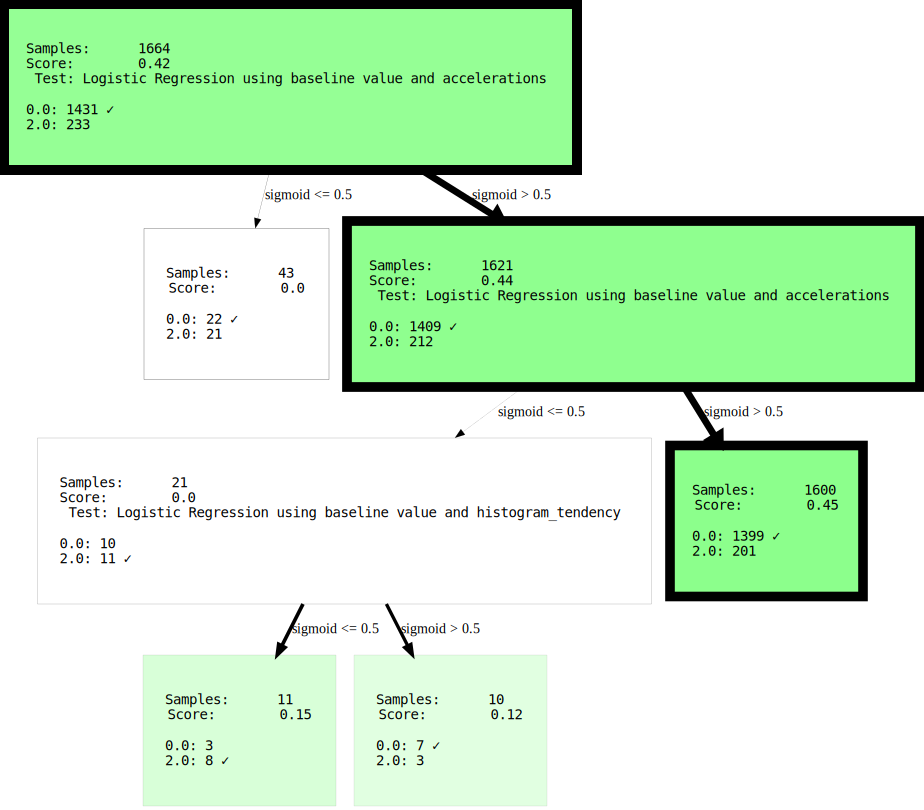

In [205]:
treeData2Twos.generate_dot_graph()

In [206]:
preds = treeData2Twos.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8774038461538461
Macro Precision =  0.9385542168674699
Micro Precision =  0.8774038461538461
Weighted Precision =  0.8924698795180722
Macro Recall =  0.5096153846153846
Micro Recall =  0.8774038461538461
Weighted Recall =  0.8774038461538461
Macro F1 =  0.4861336498171337
Micro F1 =  0.8774038461538461
Weighted F1 =  0.8224320003875311

Classification Report
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       364
         2.0       1.00      0.02      0.04        52

    accuracy                           0.88       416
   macro avg       0.94      0.51      0.49       416
weighted avg       0.89      0.88      0.82       416



In [207]:
twosProb = treeData2Twos.predict_proba(X_test.values)[:, 1]

In [208]:
fpr[1], tpr[1], _ = roc_curve(y_test.values, twosProb, pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

In [209]:
train_data = pd.read_csv('../../data/train2Threes.csv')
test_data = pd.read_csv('../../data/test2Threes.csv')

In [210]:
train_data.head()

,Unnamed: 0,Unnamed: 0.1,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,...,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0,0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,...,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,1,1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,...,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,2,2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,...,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,3,3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,...,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,4,4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,...,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [211]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
train_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [212]:
train_data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency,fetal_health
0,0.555556,0.000000,0.000000,0.600000,0.000000,0.0,0.0,0.880000,0.041667,0.296703,0.156997,0.251572,0.568807,0.362637,0.222222,0.0,0.614173,0.000000,0.5,0.0
1,0.555556,0.210526,0.002079,0.000000,0.066667,0.0,0.0,0.760000,0.125000,0.000000,0.587031,0.773585,0.036697,0.637363,0.277778,0.0,0.629921,0.027559,1.0,0.0
2,0.666667,1.000000,0.176715,0.000000,0.000000,0.0,0.0,0.266667,0.437500,0.000000,0.000000,0.886792,0.055046,0.857143,0.555556,0.0,0.866142,0.145669,1.0,0.0
3,0.648148,0.052632,0.000000,0.333333,0.000000,0.0,0.0,0.173333,0.270833,0.000000,0.457338,0.628931,0.220183,0.604396,0.555556,0.0,0.645669,0.015748,1.0,0.0
4,0.740741,0.105263,0.000000,0.266667,0.266667,0.0,0.0,0.213333,0.250000,0.175824,0.228669,0.515723,0.275229,0.472527,0.277778,0.0,0.692913,0.098425,1.0,0.0


In [213]:
col_names = [*train_data.columns[:]]

In [214]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [215]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [216]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [217]:
treeData2threes = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [218]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((416, 20), (416,), (1664, 20), (1664,))

In [219]:
treeData2threes.fit(X_train.values, y_train.values)
print(treeData2threes.score(X_train.values, y_train.values))
print(treeData2threes.score(X_test.values, y_test.values))

0.9338942307692307
0.9302884615384616


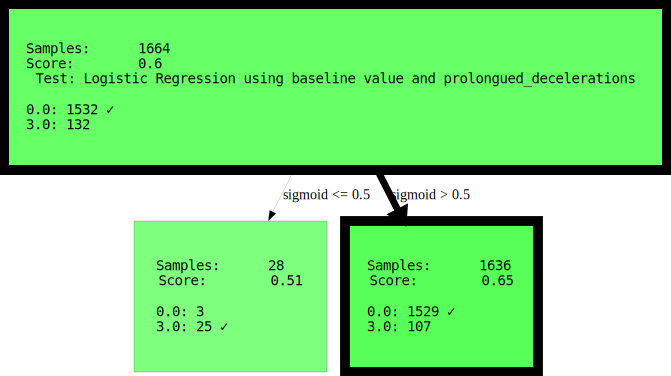

In [220]:
treeData2threes.generate_dot_graph()

In [221]:
preds = treeData2threes.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9302884615384616
Macro Precision =  0.9646341463414634
Micro Precision =  0.9302884615384616
Weighted Precision =  0.935219277673546
Macro Recall =  0.5857142857142857
Micro Recall =  0.9302884615384616
Weighted Recall =  0.9302884615384616
Macro F1 =  0.6280102371188061
Micro F1 =  0.9302884615384615
Weighted F1 =  0.9069122788500082

Classification Report
               precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       381
         3.0       1.00      0.17      0.29        35

    accuracy                           0.93       416
   macro avg       0.96      0.59      0.63       416
weighted avg       0.94      0.93      0.91       416



In [222]:
threesProb = treeData2threes.predict_proba(X_test.values)[:, 1]

In [223]:
fpr[2], tpr[2], _ = roc_curve(y_test.values, threesProb, pos_label=3)
roc_auc[2] = auc(fpr[2], tpr[2])

In [224]:
probabs = np.hstack((onesProb.reshape(-1,1), twosProb.reshape(-1,1), threesProb.reshape(-1,1)))

In [225]:
vals = np.argmax(probabs, axis=1) + 1

In [226]:
test_df = pd.read_csv('../../data/test2.csv')

In [227]:
test_y = test_df['fetal_health']

In [228]:
runMetrics(test_y.values, vals)

Accuracy =  0.8125
Macro Precision =  0.8041152263374486
Micro Precision =  0.8125
Weighted Precision =  0.8015906932573599
Macro Recall =  0.40970695970695975
Micro Recall =  0.8125
Weighted Recall =  0.8125
Macro F1 =  0.43146795013052675
Micro F1 =  0.8125
Weighted F1 =  0.7467600758514011

Classification Report
               precision    recall  f1-score   support

         1.0       0.81      1.00      0.90       329
         2.0       0.60      0.06      0.11        52
         3.0       1.00      0.17      0.29        35

    accuracy                           0.81       416
   macro avg       0.80      0.41      0.43       416
weighted avg       0.80      0.81      0.75       416



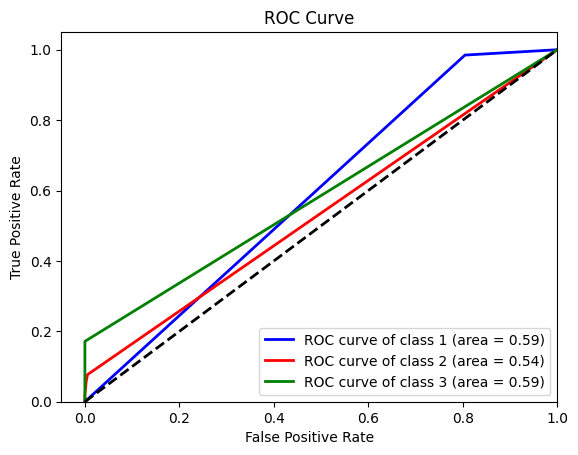

In [229]:
from itertools import cycle
lw = 2
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Dataset 3

## Simple 

In [230]:
train_data = pd.read_csv('../../data/train3simple.csv')
test_data = pd.read_csv('../../data/test3simple.csv')

In [231]:
train_data.head()

,Unnamed: 0,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0,0,0,0,0,0,0,0,0,0,0
1,1,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1,1,0,0,1,1,1,1,1,0,1
2,2,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1,1,0,0,0,1,0,2,2,0,1
3,3,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,2,1,1,0,0,0,0,3,0,0,0
4,4,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,2,2,1,0,1,1,0,4,3,0,1


In [232]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [233]:
train_data.head()

,age,duration,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0,0,0,0,0,0,0,0,0,0,0
1,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1,1,0,0,1,1,1,1,1,0,1
2,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1,1,0,0,0,1,0,2,2,0,1
3,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,2,1,1,0,0,0,0,3,0,0,0
4,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,2,2,1,0,1,1,0,4,3,0,1


In [234]:
col_names = [*train_data.columns[:]]

In [235]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [236]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [237]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [238]:
treeData3Simple = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [239]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((8230, 19), (8230,), (32918, 19), (32918,))

In [240]:
treeData3Simple.fit(X_train.values, y_train.values)
print(treeData3Simple.score(X_train.values, y_train.values))
print(treeData3Simple.score(X_test.values, y_test.values))

0.9070721185977277
0.9029161603888214


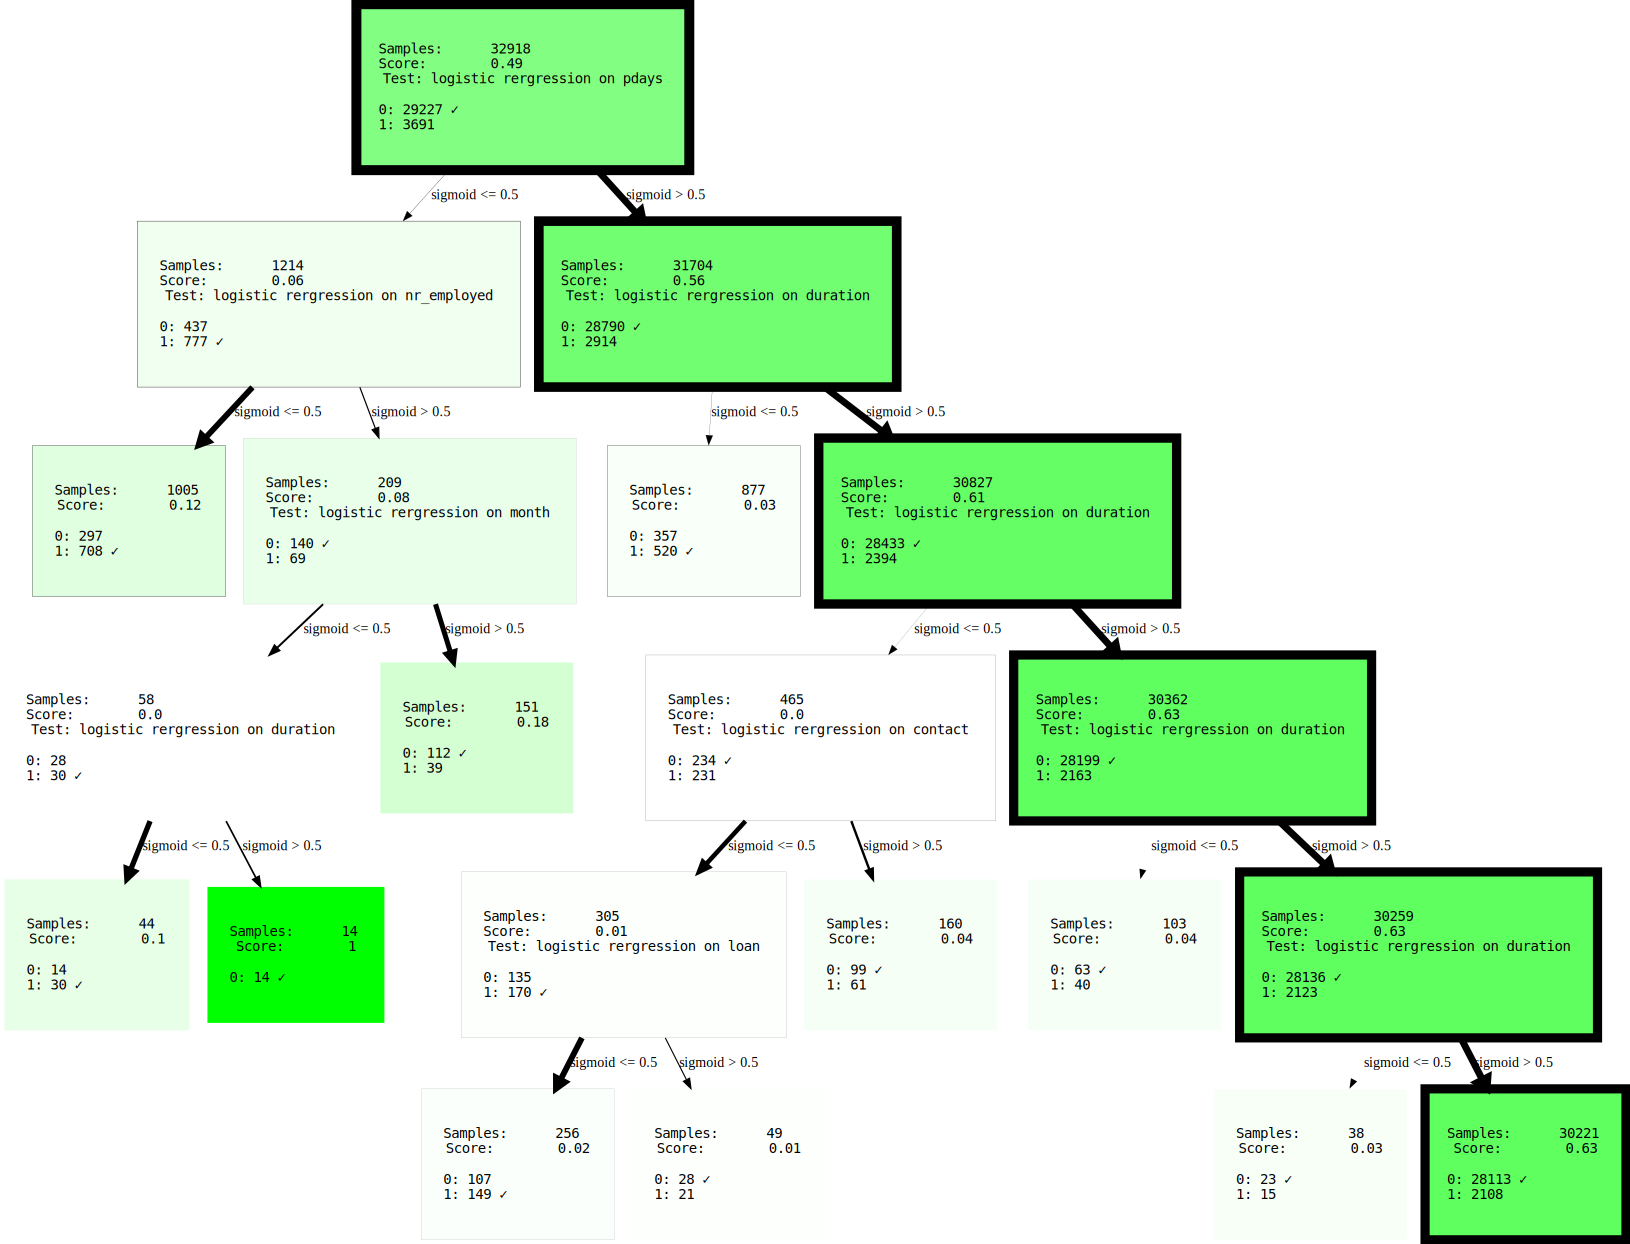

In [241]:
treeData3Simple.generate_dot_graph()

In [242]:
preds = treeData3Simple.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.9029161603888214
Macro Precision =  0.7765820409898279
Micro Precision =  0.9029161603888214
Weighted Precision =  0.8878497504660305
Macro Recall =  0.6574581842047383
Micro Recall =  0.9029161603888214
Weighted Recall =  0.9029161603888214
Macro F1 =  0.6946287563985198
Micro F1 =  0.9029161603888214
Weighted F1 =  0.8897085877656318

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7298
           1       0.63      0.34      0.44       932

    accuracy                           0.90      8230
   macro avg       0.78      0.66      0.69      8230
weighted avg       0.89      0.90      0.89      8230



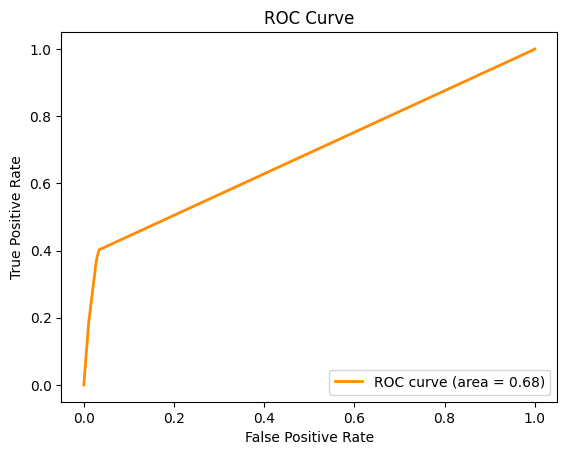

AUC =  0.6849959333911225


In [243]:
getAucRocMetrics(y_test.values, treeData3Simple.predict_proba(X_test.values)[:, 1], 1)

In [244]:
treeData3Simple = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [245]:
treeData3Simple.fit(X_train.values, y_train.values)
print(treeData3Simple.score(X_train.values, y_train.values))
print(treeData3Simple.score(X_test.values, y_test.values))

0.9028495048301841
0.8998784933171324


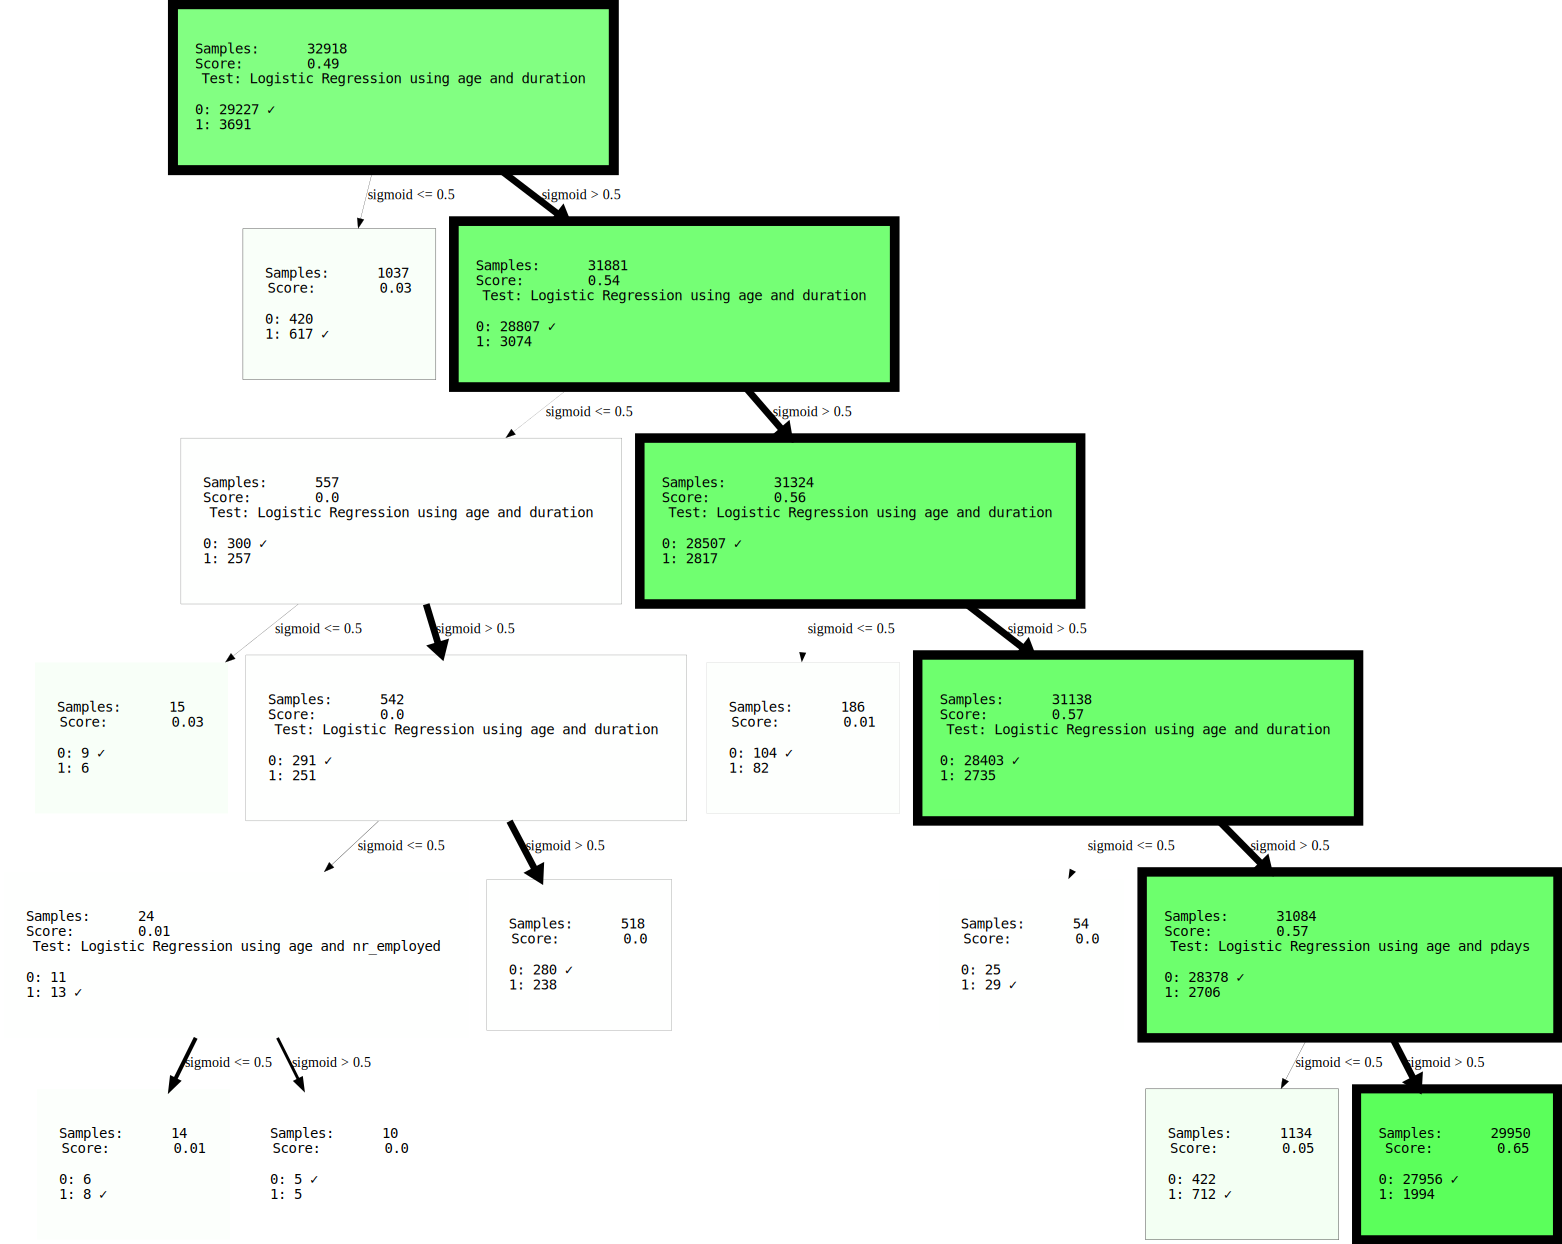

In [246]:
treeData3Simple.generate_dot_graph()

In [247]:
preds = treeData3Simple.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8998784933171324
Macro Precision =  0.761001295131828
Micro Precision =  0.8998784933171324
Weighted Precision =  0.884374480123127
Macro Recall =  0.6571492924747446
Micro Recall =  0.8998784933171324
Weighted Recall =  0.8998784933171324
Macro F1 =  0.6911052419078603
Micro F1 =  0.8998784933171324
Weighted F1 =  0.8875360013626972

Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7298
           1       0.60      0.34      0.44       932

    accuracy                           0.90      8230
   macro avg       0.76      0.66      0.69      8230
weighted avg       0.88      0.90      0.89      8230



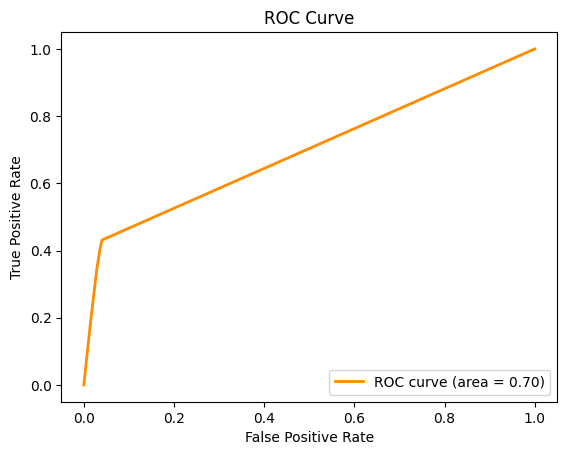

AUC =  0.69632804037087


In [248]:
getAucRocMetrics(y_test.values, treeData3Simple.predict_proba(X_test.values)[:, 1], 1)

## OneHot 

In [249]:
train_data = pd.read_csv('../../data/train3onehot.csv')
test_data = pd.read_csv('../../data/test3onehot.csv')

In [250]:
train_data.head()

,Unnamed: 0,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,...,onehotencoder__poutcome_success,remainder__age,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__cons_price_idx,remainder__cons_conf_idx,remainder__nr_employed,remainder__y
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1.0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,1.0


In [251]:
train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [252]:
train_data.head()

,onehotencoder__job_admin.,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,...,onehotencoder__poutcome_success,remainder__age,remainder__duration,remainder__campaign,remainder__pdays,remainder__previous,remainder__cons_price_idx,remainder__cons_conf_idx,remainder__nr_employed,remainder__y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.389610,0.038616,0.029412,1.0,0.0,0.389322,0.368201,0.877883,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220779,0.523733,0.058824,1.0,0.0,0.269680,0.192469,0.512287,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.246753,0.472245,0.000000,1.0,0.0,0.340608,0.154812,0.512287,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.545455,0.055511,0.029412,1.0,0.0,0.484412,0.615063,1.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.220779,0.106999,0.000000,1.0,0.0,0.250195,0.033473,0.512287,1.0


In [253]:
col_names = [*train_data.columns[:]]

In [254]:
X_train, y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1]
X_test, y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1]

In [255]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [256]:
X_train = pd.concat([X_train, y_train], axis=1)
X_test = pd.concat([X_test, y_test], axis=1)

In [257]:
treeData3OHT = HDTreeClassifier(
                    # allowed_splits=[TwoQuantileRangeSplit.build()], 
                    allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [258]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((8230, 56), (8230,), (32918, 56), (32918,))

In [259]:
treeData3OHT.fit(X_train.values, y_train.values)
print(treeData3OHT.score(X_train.values, y_train.values))
print(treeData3OHT.score(X_test.values, y_test.values))

0.9068290904672216
0.903280680437424


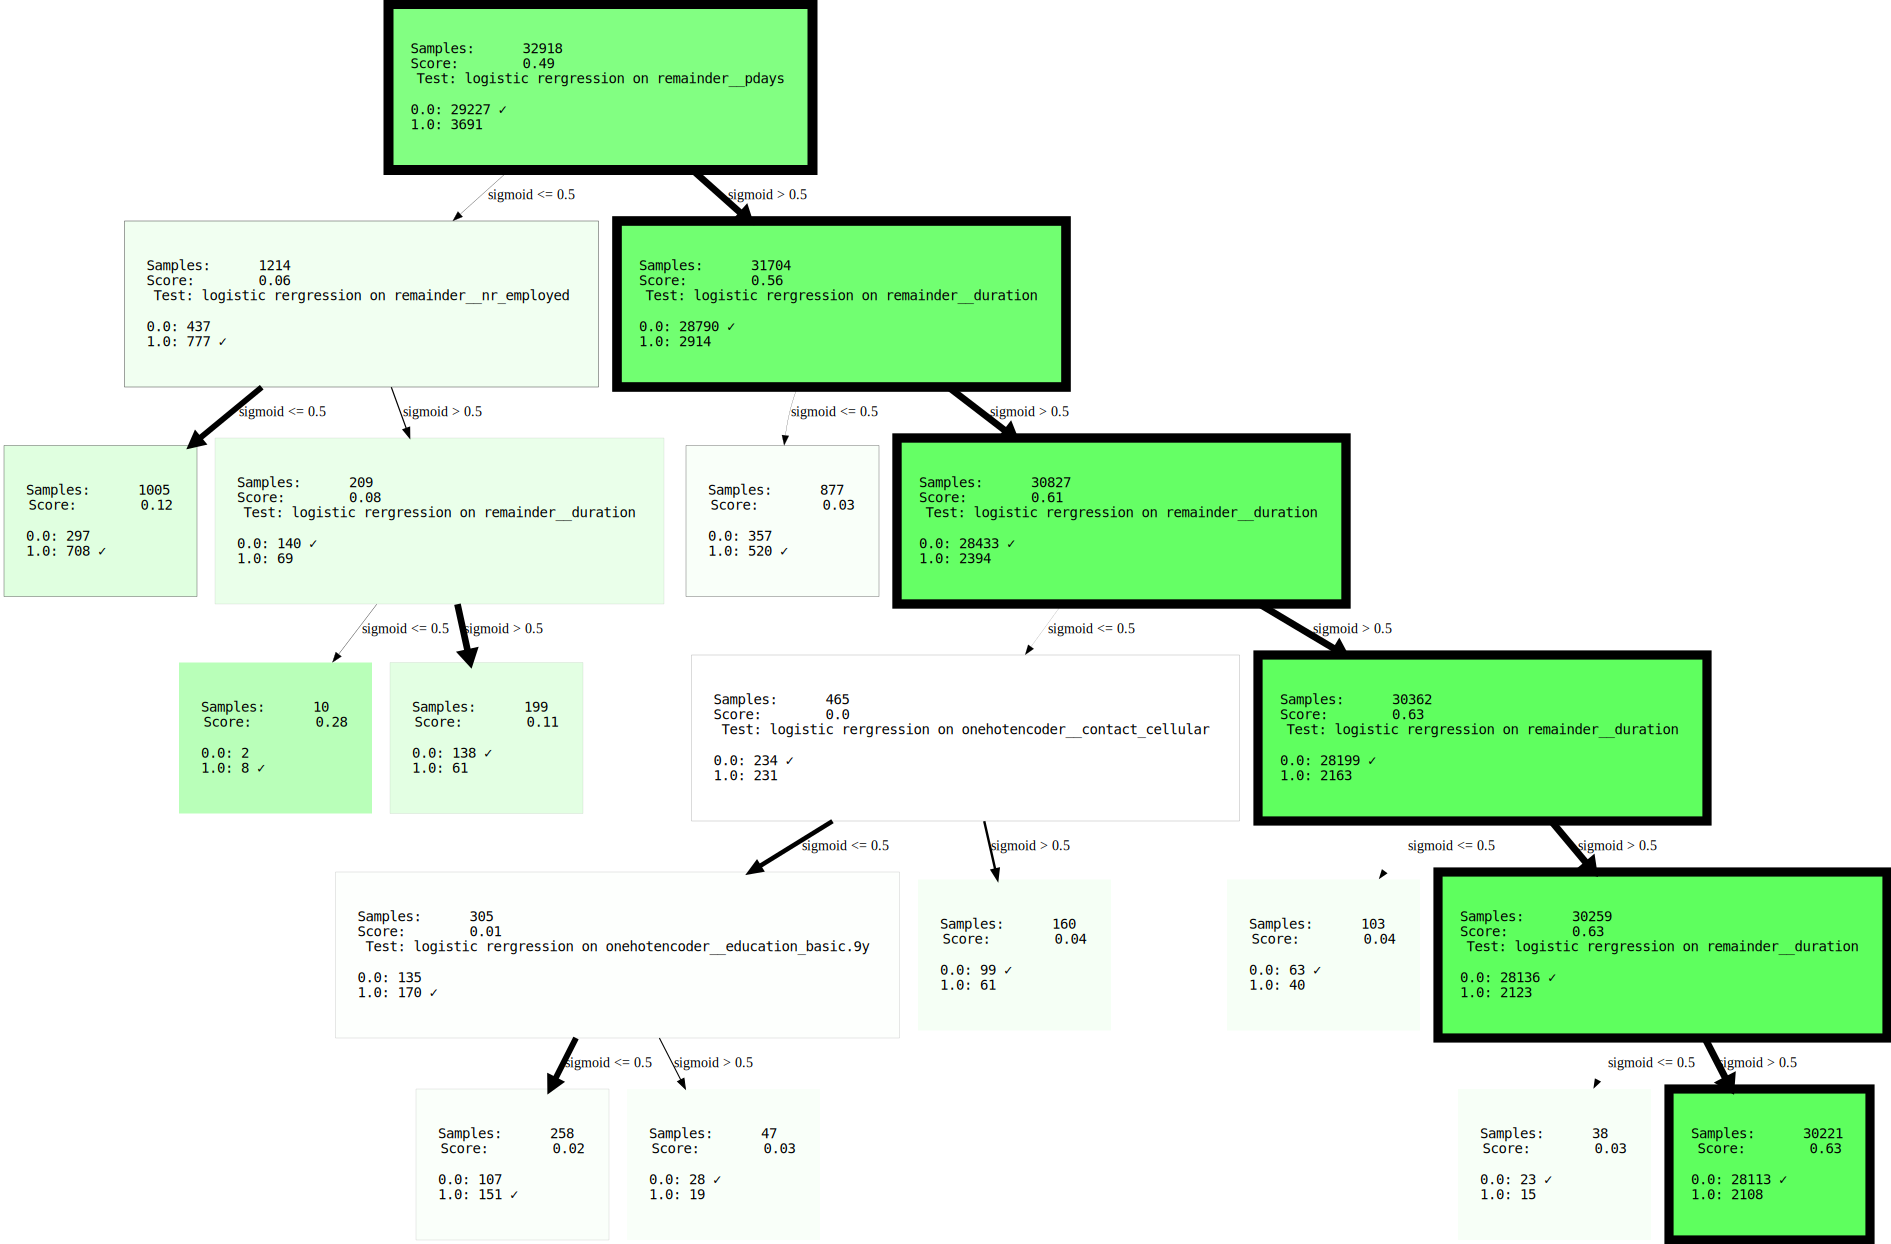

In [260]:
treeData3OHT.generate_dot_graph()

In [261]:
preds = treeData3OHT.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.903280680437424
Macro Precision =  0.7785033044750134
Micro Precision =  0.903280680437424
Weighted Precision =  0.888308775221033
Macro Recall =  0.6576637199679611
Micro Recall =  0.903280680437424
Weighted Recall =  0.903280680437424
Macro F1 =  0.6951979490901647
Micro F1 =  0.903280680437424
Weighted F1 =  0.890000106113202

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      7298
         1.0       0.64      0.34      0.44       932

    accuracy                           0.90      8230
   macro avg       0.78      0.66      0.70      8230
weighted avg       0.89      0.90      0.89      8230



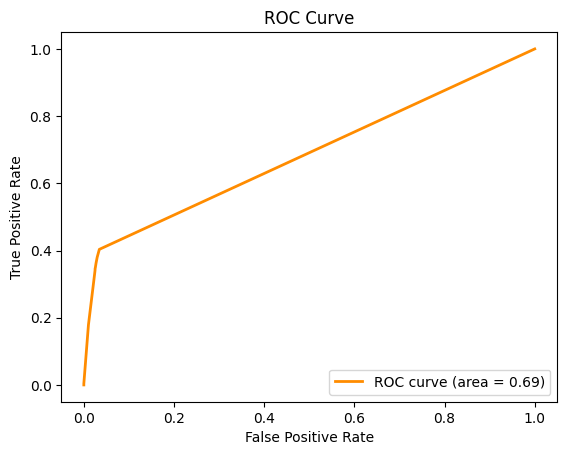

AUC =  0.6859034223027769


In [262]:
getAucRocMetrics(y_test.values, treeData3OHT.predict_proba(X_test.values)[:, 1], 1)

In [263]:
treeData3OHT = HDTreeClassifier(
                    allowed_splits=[LogisticRegressionDoubleCategorySplit.build()], 
                    # allowed_splits=[LogisticRegressionSingleSplit.build(), TwoQuantileRangeSplit.build()], 
                    # allowed_splits=[FixedValueSplit.build(), SingleCategorySplit.build(), TwentyQuantileRangeSplit.build(), TwentyQuantileSplit.build()],
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=5,
                    min_samples_at_leaf=10)

In [264]:
treeData3OHT.fit(X_train.values, y_train.values)
print(treeData3OHT.score(X_train.values, y_train.values))
print(treeData3OHT.score(X_test.values, y_test.values))

0.903639346254329
0.8991494532199271


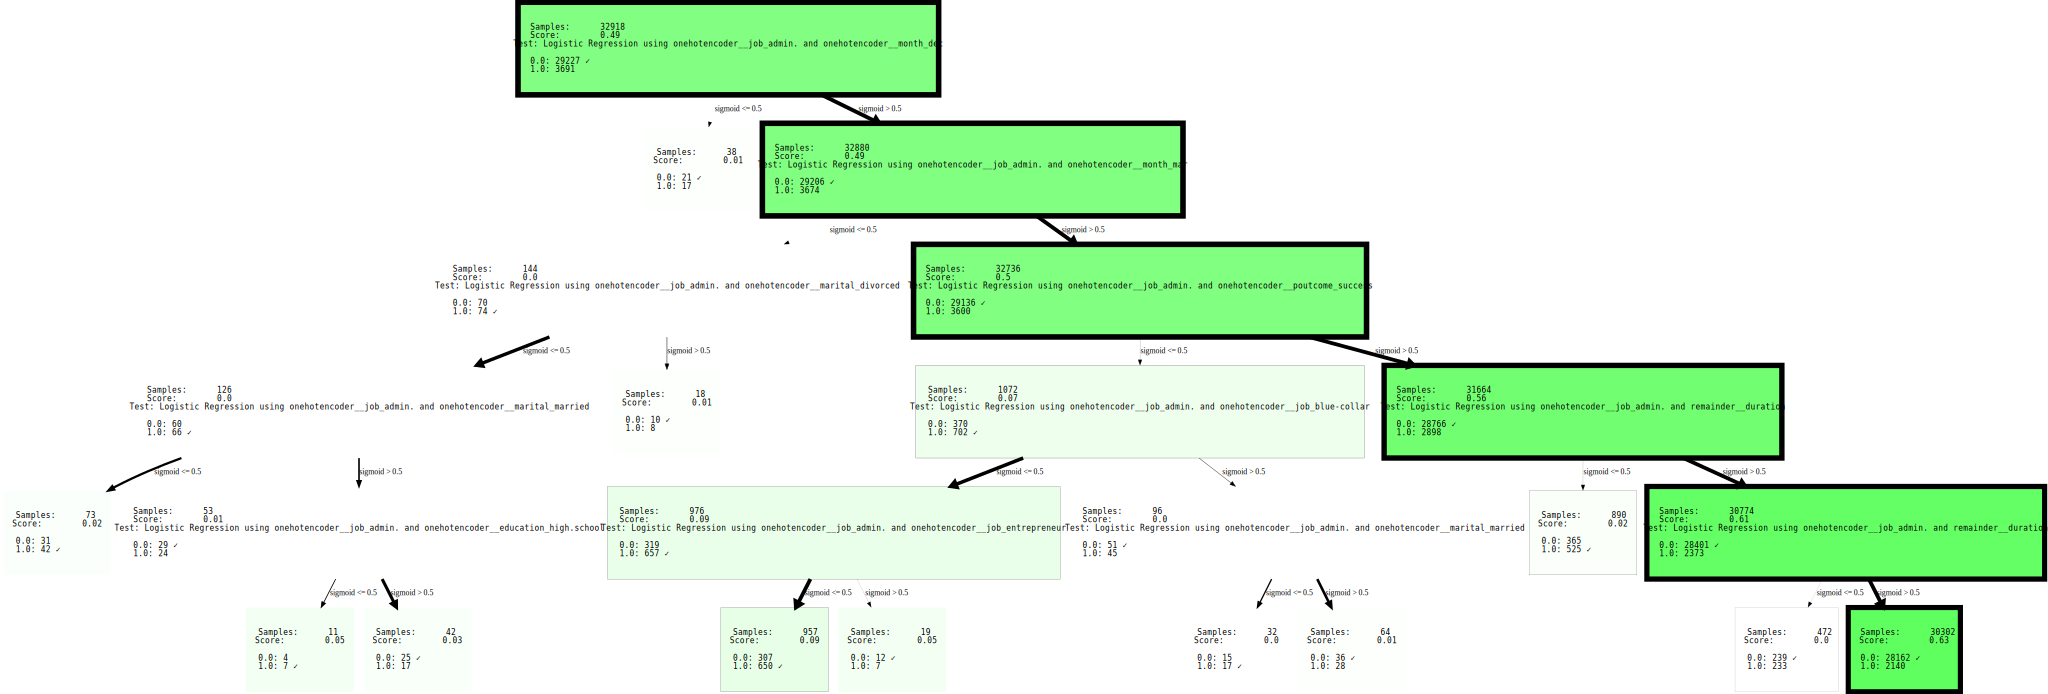

In [265]:
treeData3OHT.generate_dot_graph()

In [266]:
preds = treeData3OHT.predict(X_test.values)
preds = [float(i) for i in preds]
runMetrics(y_test.values, preds)

Accuracy =  0.8991494532199271
Macro Precision =  0.7633564941752378
Micro Precision =  0.8991494532199271
Weighted Precision =  0.881678144500791
Macro Recall =  0.6389554078547006
Micro Recall =  0.8991494532199271
Weighted Recall =  0.8991494532199271
Macro F1 =  0.6747500857537214
Micro F1 =  0.8991494532199271
Weighted F1 =  0.8837211760535847

Classification Report
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.94      7298
         1.0       0.61      0.30      0.40       932

    accuracy                           0.90      8230
   macro avg       0.76      0.64      0.67      8230
weighted avg       0.88      0.90      0.88      8230



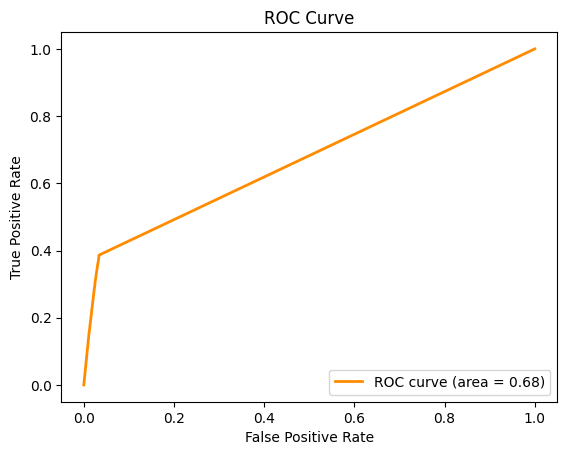

AUC =  0.6767862645653993


In [267]:
getAucRocMetrics(y_test.values, treeData3OHT.predict_proba(X_test.values)[:, 1], 1)